# Python Homework 6

**Release date:** Monday, Feb 24th <br>
**Due date:** Friday, __Mar 6th__, 11:59 p.m. via GauchoSpace

**Instruction:** Please upload your file on GauchoSpace with filename "PythonHW6_YOURPERMNUMBER"; a pdf or html file.

__Background:__ In mathematical finance, Markov chains are used to model the default risk of a company or country (more specifically, the default of a company's or country's liability like a corporate or government bond - see e.g. PSTAT 171 and PSTAT 170). 

Rating agencies (like <i>Standard & Poor’s</i>, <i>Moody’s</i>, <i>Fitch</i>) rate the financial stability of a company and classify them according to different classes. A possible classification may range from 'AAA' for debitors with a very good credit rating to 'CCC' for debitors which are very likely to delay in paying a debt; and 'D' for those debitors which can't satisfy their financial liabilities anymore (in other words, they are default). 

The yearly credit rating of a company can be modeled as a Markov chain $(X_n)_{n=0,1,2,\ldots}$ with state space

$$ \mathcal{S} = \{ AAA,\, AA,\, A,\, BBB,\, BB,\, B,\, CCC,\, D \} $$

where $X_n$ represents the credit rating class of a company in the $n$-th year. The transition probabilities are given by

\begin{equation*}
\begin{array}{ccccccccc}
 & AAA & AA & A & BBB & BB & B & CCC & D \\
 AAA & 92.07 & 7.09 & 0.63 & 0.15 & 0.06 & 0.00 & 0.00 & 0.00 \\ 
 AA & 0.62 & 90.84 & 7.76 & 0.59 & 0.06 & 0.10 & 0.02 & 0.01 \\
 A & 0.05 & 2.09 & 91.38 & 5.79 & 0.44 & 0.16 & 0.04 & 0.05 \\
 BBB & 0.03 & 0.21 & 4.10 & 89.37 & 4.82 & 0.86 & 0.24 & 0.37 \\
 BB & 0.03 & 0.08 & 0.40 & 5.54 & 83.24 & 8.15 & 1.11 & 1.45 \\
 B & 0.00 & 0.08 & 0.27 & 0.34 & 5.39 & 82.41 & 4.92 & 6.59 \\
 CCC & 0.10 & 0.00 & 0.29 & 0.58 & 1.55 & 10.54 & 52.80 & 34.14 \\
 D & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 100.0
\end{array} 
\end{equation*}

<i>Remark</i>: For your implementations below, you can label the different states from $0$ to $7$, where $0$ represents state $AAA$, $1$ represents state $AA$, and so on.

As usual, we start with loading some packages:

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Problem 1 (3 points)

1. Implement the transition probability matrix $P$ from above as a two dimensional <tt>numpy.array()</tt>.

In [5]:
# WRITE YOUR OWN CODE HERE! 
transMatrix = np.array([[92.07,7.09,0.63,0.15,0.06,0.0,0.0,0.0], 
                       [0.62,90.84,7.76,0.59,0.06, 0.10, 0.02, 0.01],
                       [0.05, 2.09, 91.38, 5.79, 0.44, 0.16, 0.04, 0.05],
                       [0.03, 0.21, 4.10, 89.37, 4.82, 0.86, 0.24, 0.37],
                       [0.03, 0.08, 0.40, 5.54, 83.24, 8.15, 1.11, 1.45],
                       [0.0, 0.08, 0.27, 0.34, 5.39, 82.41, 4.92, 6.59],
                       [0.1, 0.0, 0.29, 0.58, 1.55, 10.54, 52.80, 34.14],
                       [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0]])
transMatrix

array([[9.207e+01, 7.090e+00, 6.300e-01, 1.500e-01, 6.000e-02, 0.000e+00,
        0.000e+00, 0.000e+00],
       [6.200e-01, 9.084e+01, 7.760e+00, 5.900e-01, 6.000e-02, 1.000e-01,
        2.000e-02, 1.000e-02],
       [5.000e-02, 2.090e+00, 9.138e+01, 5.790e+00, 4.400e-01, 1.600e-01,
        4.000e-02, 5.000e-02],
       [3.000e-02, 2.100e-01, 4.100e+00, 8.937e+01, 4.820e+00, 8.600e-01,
        2.400e-01, 3.700e-01],
       [3.000e-02, 8.000e-02, 4.000e-01, 5.540e+00, 8.324e+01, 8.150e+00,
        1.110e+00, 1.450e+00],
       [0.000e+00, 8.000e-02, 2.700e-01, 3.400e-01, 5.390e+00, 8.241e+01,
        4.920e+00, 6.590e+00],
       [1.000e-01, 0.000e+00, 2.900e-01, 5.800e-01, 1.550e+00, 1.054e+01,
        5.280e+01, 3.414e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+02]])

2. Provide the probability vector for the transition probabilities from state 3 to all other states 0, 1, 2,..., 7

In [6]:
# WRITE YOUR OWN CODE HERE! 
state3trans = transMatrix[3]
state3trans

array([3.000e-02, 2.100e-01, 4.100e+00, 8.937e+01, 4.820e+00, 8.600e-01,
       2.400e-01, 3.700e-01])

3. Use suitable Matrix operations to <u>compute the probability</u> that a company which is rated with 'AAA' today will <u>not</u> default during the next 8 years. 

In [7]:
# WRITE YOUR OWN CODE HERE! 

## HINT: YOU MAY WANT TO USE np.linalg.matrix_power() TO COMPUTE POWERS OF A MATRIX
prob = 1
i = 1
while i <=8:
    nextYear = np.linalg.matrix_power(transMatrix, i)
    prob = prob*(1 - transMatrix[0][7]/100)
    i += 1
prob

1.0

## Problem 2 (4 points)

Write a function called <tt>simulateRating(...)</tt> which simulates the Markov chain. 

Input:
* <tt>startRating</tt>: Initial state of the Markov chain at time 0
* <tt>numberOfSteps</tt>: Number of steps $n$
* <tt>P</tt>: Transition matrix

Output:
* <tt>samplePath</tt>: An array of length $n$ with the values $X_0, X_1, \ldots, X_n$.

In [10]:
   ## WRITE YOUR OWN CODE HERE
   ## HINT: USE np.random.choice()
def simulateRating(startRating, numberOfSteps, P):
    samplePath = [startRating]
    currentState = startRating
    stateSpace = list(range(P.shape[0]))
    nextState = 0
    for i in range(numberOfSteps):
        nextState = np.random.choice(stateSpace, p = P[currentState]/100)
        currentState = nextState
        samplePath.append(currentState)
    return samplePath

In [11]:
## TEST YOUR FUNCTION HERE
simulateRating( startRating = 0, numberOfSteps = 10, P = transMatrix)

[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

## Problem 3 (3 points)

Write a code to simulate and plot <tt>numPaths = 5</tt> simulated paths of length <tt>lengthPath = 100</tt> with staring value <tt>startRating = 2</tt> in one plot.

In [12]:
# WRITE YOUR OWN CODE HERE! FEEL FREE TO INSERT MORE CELLS!
# ADD SOME COMMENTS TO YOUR CODE!
def simPlot(numPaths, lengthPath, startRating):
    i = 0
    while i < numPaths:
        plt.plot(simulateRating(startRating, numberOfSteps = lengthPath, P = transMatrix))
        i += 1

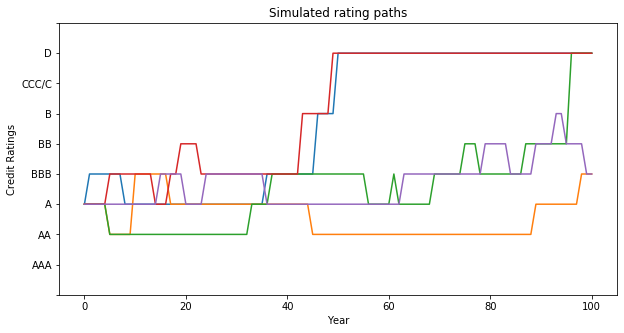

In [13]:
# COMPLETE/MODIFY THE PLOT COMMANDS ACCORDINGLY

plt.figure( figsize=( 10, 5 ) )

plt.title('Simulated rating paths')

plt.ylabel('Credit Ratings')
plt.xlabel('Year')
simPlot(numPaths = 5, lengthPath = 100, startRating = 2)
plt.ylim( -1, 8 )
ratings = [ '', 'AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC/C', 'D', '' ]
plt.yticks( range( -1, 9 ), ratings )

plt.show()